In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_hdf('./data/m12i_cluster_data_v2.h5', key='star')

In [3]:
df_small = df.loc[df['subhalo_mass_stars']>=1e9].copy()

In [5]:
print(len(df_small))

168294


In [7]:
df_small.columns

Index(['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'feH', 'id_stars',
       'radial_distance_stars', 'redshift_stars', 'snap_list_stars',
       'star_mass', 'subhalo_mass_stars', 'subhalo_stellar_mass_stars',
       'vphistar', 'vrstar', 'vthetastar', 'vxstar', 'vystar', 'vzstar',
       'xstar', 'ystar', 'zstar', 'subhalo_infall_mass_stars',
       'subhalo_infall_stellar_mass_stars', 'form_scalefactor', 'form_time',
       'vr_cyl', 'vphi_cyl', 'vz_cyl', 'r_cyl', 'phi_cyl', 'z_cyl', 'vx_cart',
       'vy_cart', 'vz_cart', 'x_cart', 'y_cart', 'z_cart', 'cluster_id',
       'mgfe', 'jrstar', 'jzstar', 'jphistar', 'estar', 'pstar', 'kstar',
       'lxstar', 'lystar', 'lzstar', 'apostar', 'peristar', 'eccstar',
       'zmaxstar'],
      dtype='object')

In [8]:
df_small.sort_values('subhalo_infall_mass_stars', inplace=True, kind='stable')

In [9]:
prev_val = -1
prev_id = 0
df_small['cluster_id'] = 0
cluster_ids = np.zeros((len(df_small)), dtype=np.int32)
for i, (idx, row) in enumerate(df_small.iterrows()):
    if (row['subhalo_infall_mass_stars'] - prev_val)>0.1:
        prev_id+=1
        prev_val = row['subhalo_infall_mass_stars']
    cluster_ids[i] = prev_id
print(cluster_ids)
df_small['cluster_id'] = cluster_ids

[ 1  1  1 ... 76 76 76]


In [10]:
df_small.head()

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,feH,id_stars,radial_distance_stars,redshift_stars,snap_list_stars,star_mass,subhalo_mass_stars,...,estar,pstar,kstar,lxstar,lystar,lzstar,apostar,peristar,eccstar,zmaxstar
56892,56892,56892,56892,-3.756637,1355050,14.041376,2.0,172,4470.951498,1.008120e+09,...,-78918.298939,-115558.759562,36640.460623,283.043700,-1496.308276,-60.588869,32.443207,2.423908,0.860963,26.806763
76834,76834,76834,76834,-2.595785,6552585,15.795071,2.0,172,4848.241188,1.008120e+09,...,-58202.029608,-114147.017321,55944.987714,767.903784,-2207.505188,-986.889779,60.060726,3.599513,0.886915,28.795151
91908,91908,91908,91908,-3.872660,10114532,4.850723,2.0,172,5234.642425,1.008120e+09,...,-84163.983727,-183670.906461,99506.922734,759.501802,111.505381,465.913105,30.365747,0.991062,0.936788,9.757058
125564,125564,125564,125564,-2.742247,177687,6.634918,3.0,120,4499.582928,1.104274e+09,...,-158186.895706,-162822.056019,4635.160313,186.409008,81.272008,13.182070,7.124517,0.371895,0.900780,3.177483
128304,128304,128304,128304,-2.614258,1420290,10.272408,3.0,120,4749.431617,1.104274e+09,...,-122200.864992,-137446.615853,15245.750861,1271.461175,244.723402,-1145.611994,10.745133,4.161676,0.441641,6.575896


[70 15 38 10 45]


<AxesSubplot:xlabel='feH', ylabel='mgfe'>

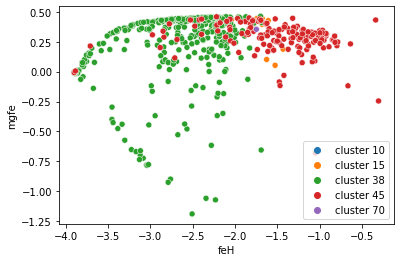

In [12]:
chosen_cluster_ids = np.random.choice(np.arange(1, 77), 5)
print(chosen_cluster_ids)
chosen_ids = np.argwhere(df_small['cluster_id'].isin(chosen_cluster_ids).to_numpy())[:,0]
hues = np.array([f'cluster {id}' for id in df_small['cluster_id'].to_numpy()])[chosen_ids]
sns.scatterplot(data=df_small.iloc[chosen_ids], x='feH', y='mgfe', hue=hues)

In [28]:
df_small.loc[df_small['cluster_id']==19]

,Unnamed: 0,feH,id_stars,radial_distance_stars,redshift_stars,snap_list_stars,star_mass,subhalo_mass_stars,subhalo_peak_mass,subhalo_stellar_mass_stars,...,vrstar,vthetastar,vxstar,vystar,vzstar,xstar,ystar,zstar,cluster_id,mgfe
29817,29817,-3.625264,6749974,8.519153,3.324324,108,4527.344299,3.426781e+09,3.427351e+09,1488385.25,...,-102.555305,-175.52771,-222.167953,101.606224,30.203451,2.735775,-4.589271,6.635518,19,0.07311


In [29]:
remove_cluster = []
cutoff = 100
for id in range(1, 77):
    if len(df_small.loc[df_small['cluster_id']==id]) < cutoff:
        remove_cluster.append(id)

print(remove_cluster)

df_small_small = df_small.loc[~df_small['cluster_id'].isin(remove_cluster)].copy()
print(76 - len(remove_cluster))

[1, 2, 3, 4, 5, 6, 7, 9, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 26, 29, 31, 32, 33, 34, 35, 36, 39, 40, 41, 42, 43, 46, 47, 48, 51, 54, 55, 56, 58, 59, 62, 63, 65, 66, 69, 70, 72, 73]
26


In [30]:
print(len(df_small_small))
df_small_small.head()

167692


,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,feH,id_stars,radial_distance_stars,redshift_stars,snap_list_stars,star_mass,subhalo_mass_stars,...,estar,pstar,kstar,lxstar,lystar,lzstar,apostar,peristar,eccstar,zmaxstar
51382,51382,51382,51382,-2.527314,3264,8.300297,2.0,172,5846.741590,1.062251e+09,...,-71011.817304,-150395.684578,79383.867275,-422.372077,48.902985,1250.778236,42.297962,2.323839,0.895843,7.026660
51386,51386,51386,51386,-1.866186,7669,2.496213,2.0,172,4715.639743,1.062251e+09,...,-73299.833500,-229006.944471,155707.110971,259.146851,-1041.161889,482.220609,39.210751,2.399892,0.884650,31.799921
51471,51471,51471,51471,-1.574514,62126,5.043932,2.0,172,4697.787914,1.062251e+09,...,-93370.381317,-178260.332989,84889.951672,1320.301954,450.846196,-701.500258,23.358376,1.809812,0.856183,14.766367
51478,51478,51478,51478,-2.118025,62575,5.070713,2.0,172,4628.504936,1.062251e+09,...,-67927.153957,-175631.902022,107704.748064,1389.161889,602.123786,-832.833222,44.620625,4.721407,0.808625,36.183079
51531,51531,51531,51531,-2.302408,102707,10.410017,2.0,172,4594.159608,1.062251e+09,...,-81990.774985,-137313.853721,55323.078736,167.487196,-1521.877549,1210.466371,30.599154,3.131938,0.814300,17.289276


In [46]:
prev_val = -1
prev_id = 0
df_small_small['cluster_id'] = 0
cluster_ids = np.zeros((len(df_small_small)), dtype=np.int32)
for i, (idx, row) in enumerate(df_small_small.iterrows()):
    if (row['subhalo_peak_mass'] - prev_val)>0.1:
        prev_id+=1
        prev_val = row['subhalo_peak_mass']
    cluster_ids[i] = prev_id
print(cluster_ids)
df_small_small['cluster_id'] = cluster_ids

[ 1  1  1 ... 50 50 50]


In [48]:
df_small_small.tail()

,Unnamed: 0,feH,id_stars,radial_distance_stars,redshift_stars,snap_list_stars,star_mass,subhalo_mass_stars,subhalo_peak_mass,subhalo_stellar_mass_stars,...,vrstar,vthetastar,vxstar,vystar,vzstar,xstar,ystar,zstar,cluster_id,mgfe
136482,136482,-1.189347,13772951,10.771311,1.377359,227,5245.304615,4.282621e+10,6.451567e+10,942664576.0,...,-180.637390,70.557098,-127.893402,-36.960407,-141.319977,9.133440,3.344618,4.627629,50,0.296635
136484,136484,-2.303380,13839923,3.023079,1.377359,227,5115.768423,4.282621e+10,6.451567e+10,942664576.0,...,-97.654022,-176.574524,-394.861389,-289.413147,61.022011,-0.497667,2.137421,2.079126,50,0.426639
136485,136485,-1.865876,13857098,14.995711,1.377359,227,4801.821897,4.282621e+10,6.451567e+10,942664576.0,...,-185.101379,58.339264,-101.831299,-25.465464,-164.296402,11.403449,0.765757,9.708055,50,0.427046
136486,136486,-2.077071,13920866,10.554985,1.377359,227,4829.122123,4.282621e+10,6.451567e+10,942664576.0,...,-187.347992,-97.208725,59.406490,-277.727112,43.102951,-8.366145,5.772217,2.845495,50,0.312353
136487,136487,-1.648837,13959740,14.551060,1.377359,227,4811.558964,4.282621e+10,6.451567e+10,942664576.0,...,-52.771210,-68.148277,-20.822216,-15.045026,82.286217,11.469775,7.372729,-5.081386,50,0.362172


In [40]:
df_small.to_hdf('./data/m12i_cluster_data_large_mass.h5', key='star')

In [53]:
chosen_cluster_ids = np.random.choice(np.arange(1, 51), 5, replace=False)
print(chosen_cluster_ids)
chosen_ids = np.argwhere(df_small_small['cluster_id'].isin(chosen_cluster_ids).to_numpy())[:,0]
hues = np.array([f'cluster {id}' for id in df_small_small['cluster_id'].to_numpy()])[chosen_ids]

[35  4 42  9 49]


<AxesSubplot:xlabel='feH', ylabel='mgfe'>

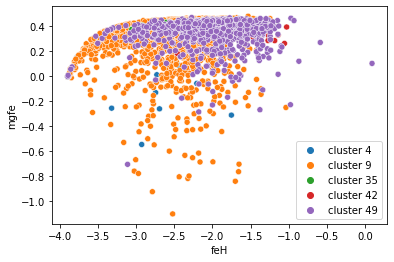

In [54]:
sns.scatterplot(data=df_small_small.iloc[chosen_ids], x='feH', y='mgfe', hue=hues)

In [55]:
df_small_small.loc[df_small_small['cluster_id']==42]

,Unnamed: 0,feH,id_stars,radial_distance_stars,redshift_stars,snap_list_stars,star_mass,subhalo_mass_stars,subhalo_peak_mass,subhalo_stellar_mass_stars,...,vrstar,vthetastar,vxstar,vystar,vzstar,xstar,ystar,zstar,cluster_id,mgfe
139948,139948,-1.837030,1211093,6.733328,1.25,242,5053.433379,4.201140e+10,4.200855e+10,470294624.0,...,-25.719589,-53.013020,-459.853149,21.806028,40.659428,0.881117,6.245672,2.356465,42,0.330198
139955,139955,-1.267967,1559912,14.129144,1.25,242,5077.803983,4.201140e+10,4.200855e+10,470294624.0,...,-106.654053,-13.377586,-327.846100,-140.071060,-84.740120,4.029377,-6.013536,12.134010,42,0.321373
139974,139974,-2.116419,2039006,14.426775,1.25,242,4393.912065,4.201140e+10,4.200855e+10,470294624.0,...,-181.967575,-197.828949,-195.722244,229.066452,116.780388,13.068573,-3.006530,5.320246,42,0.290150
139977,139977,-1.371637,2051060,3.968427,1.25,242,5089.874302,4.201140e+10,4.200855e+10,470294624.0,...,461.020599,-160.392822,-409.538513,275.457367,172.080521,-3.885153,0.802366,0.101055,42,0.353204
139988,139988,-1.184096,2556650,6.598693,1.25,242,5358.516543,4.201140e+10,4.200855e+10,470294624.0,...,361.517853,-135.432053,-23.497768,426.424652,-1.250641,2.328343,5.715749,-2.334907,42,0.280644
140022,140022,-1.840144,3495009,12.152544,1.25,242,5061.756244,4.201140e+10,4.200855e+10,470294624.0,...,-28.909216,127.951660,262.383636,210.826797,-36.366131,1.692781,-5.609610,-10.646647,42,0.302249
140027,140027,-1.305689,3732019,9.367037,1.25,242,5088.292080,4.201140e+10,4.200855e+10,470294624.0,...,-319.984344,-173.031525,-111.283043,-309.693451,167.177689,4.784585,8.051089,0.170522,42,0.396705
140055,140055,-1.777162,4593996,13.319683,1.25,242,5102.411434,4.201140e+10,4.200855e+10,470294624.0,...,-329.802979,-76.888832,328.051453,-5.896605,166.510696,-11.385599,5.810216,-3.744792,42,0.300545
140061,140061,-1.478231,4629815,3.238835,1.25,242,4634.284017,4.201140e+10,4.200855e+10,470294624.0,...,134.504578,-295.493652,424.095703,331.921936,146.660049,2.384923,-0.840527,-2.023785,42,0.319866
140069,140069,-1.252701,4796389,1.632607,1.25,242,4792.213173,4.201140e+10,4.200855e+10,470294624.0,...,173.192108,-529.651001,-575.270020,75.292976,173.041168,-0.923908,-0.275784,-1.317476,42,0.402607


In [56]:
df_small_small.to_hdf('./data/m12i_cluster_data_large_mass_large_cluster.h5', key='star')